In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import numpy as np

def sigmoid(z):
    return 1/(1 + np.exp(-z))

assert(sigmoid(0) == 0.5)
assert(sigmoid(10000) == 1.0)
assert(sigmoid(-10000) == 0.0)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


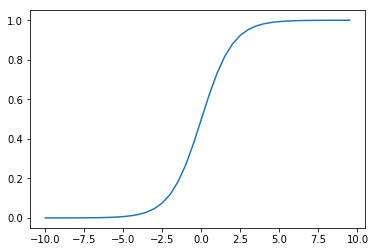

In [31]:
plt.plot(np.arange(-10, 10, 0.5), [sigmoid(z) for z in np.arange(-10, 10, 0.5)])
plt.show()

In [35]:
import numpy as np

class LogisticRegression(object):
    #eta is the learning rate between 0.0 and 1.0

    #epochs passes over the training dataset

    
     #learning rule, sgd (stochastic gradient descent)or gd (gradient descent).

    #lambda is regularization parameter for L2 regularization.No regularization if lambda_=0.0.

    
    #w is Weights after fitting.

    #cost is list of floats with sum of squared error cost (sgd or gd) for every  epoch.

    def __init__(self, eta=0.01, epochs=50, lambda_=0.0, learning='sgd'):
        self.eta = eta
        self.epochs = epochs
        self.lambda_ = lambda_

        if not learning in ('sgd', 'gd'):
            raise ValueError('learning must be sgd or gd')
        self.learning = learning


    def fit(self, X, y, init_weights=None):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.

        y : array-like, shape = [n_samples]
            Target values.

        init_weights : array-like, shape = [n_features + 1]
            Initial weights for the classifier. If None, weights
            are initialized to 0.

        Returns
        -------
        self : object

        """
        if not len(X.shape) == 2:
            raise ValueError('X must be a 2D array. Try X[:,np.newaxis]')

        if (np.unique(y) != np.array([0, 1])).all():
            raise ValueError('Supports only binary class labels 0 and 1')

        if not isinstance(init_weights, np.ndarray):
        # Initialize weights to 0
            self.w_ = np.zeros(1 + X.shape[1])
        else:
            self.w_ = init_weights

        self.cost_ = []

        for i in range(self.epochs):

            if self.learning == 'gd':
                y_val = self.activation(X)
                errors = (y - y_val)
                regularize = self.lambda_ * self.w_[1:]
                self.w_[1:] += self.eta * X.T.dot(errors)
                self.w_[1:] += regularize
                self.w_[0] += self.eta * errors.sum()

            elif self.learning == 'sgd':
                cost = 0.0
                for xi, yi in zip(X, y):
                    yi_val = self.activation(xi)
                    error = (yi - yi_val)
                    regularize = self.lambda_ * self.w_[1:]
                    self.w_[1:] += self.eta * xi.dot(error)
                    self.w_[1:] += regularize
                    self.w_[0] += self.eta * error

            self.cost_.append(self._logit_cost(y, self.activation(X)))
        return self


    def predict(self, X):
        """
        Predict class labels for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.

        Returns
        ----------
        class : int
          Predicted class label.

        """
        # equivalent to np.where(self.activation(X) >= 0.5, 1, 0)
        return np.where(self.net_input(X) >= 0.0, 1, 0)


    def net_input(self, X):
        """ Net input function. """
        return X.dot(self.w_[1:]) + self.w_[0]


    def activation(self, X):
        """
        Predict class probabilities for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.

        Returns
        ----------
        int
          Class probability.

        """
        z = self.net_input(X)
        return self._sigmoid(z)


    def _logit_cost(self, y, y_val):
        logit = -y.dot(np.log(y_val)) - ((1 - y).dot(np.log(1 - y_val)))
        regularize = (self.lambda_ / 2) * self.w_[1:].dot(self.w_[1:])
        return logit + regularize


    def _sigmoid(self, z):
         return 1.0 / (1.0 + np.exp(-z))

SyntaxError: invalid syntax (<ipython-input-35-26c973561ed6>, line 37)

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import pandas as pd
import numpy as np
import mlxtend



df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values

# standardize features
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

lr = LogisticRegression(eta=0.1, epochs=100)
lr.fit(X_std, y)


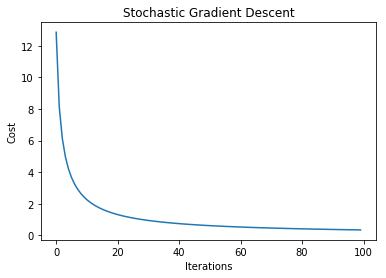

In [34]:
plt.plot(range(len(lr.cost_)), lr.cost_)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Stochastic Gradient Descent')
#plt.text(40, 45, 'eta = 0.01')
plt.show()